In [1]:
from pyspark.sql import functions as F
# from pyspark.sql.functions import udf, size,


import pprint
import json
# mist-aggregated-stats-production/event_generator/ap_last_seen
 
env = "production"
env = "staging"
# DATE = 'dt=2020-08-21'

s3_bucket = 's3://mist-aggregated-stats-{env}/event_generator/ap_last_seen/*'.format(env=env) 
print(s3_bucket)

spark.conf.set("spark.sql.session.timeZone", "PST")
 
rdd = sc.sequenceFile(s3_bucket).map(lambda x: json.loads(x[1]))
#         .persist()

s3://mist-aggregated-stats-staging/event_generator/ap_last_seen/*


In [2]:

from pyspark import *
from pyspark.sql import *
from pyspark.sql.types import *
ff = {'org_id': StringType,
      'site_id': StringType,
      'ap_id': StringType,
      'model': StringType,
      'firmware_version': StringType,
      'terminator_timestamp': LongType}
fields = [StructField(k, v()) for k,v in ff.items()]
schema = StructType(fields)


# spark = SparkSession.builder.appName('fun').getOrCreate()

# df_ap = spark.CreateDataFrame(rdd, schema)

df_ap = spark.createDataFrame(rdd, schema)

# df_ap = rdd.toDF()
df_ap.printSchema()

root
 |-- org_id: string (nullable = true)
 |-- site_id: string (nullable = true)
 |-- ap_id: string (nullable = true)
 |-- model: string (nullable = true)
 |-- firmware_version: string (nullable = true)
 |-- terminator_timestamp: long (nullable = true)



In [3]:

df_ap = df_ap.withColumnRenamed("org_id", "org")\
        .withColumnRenamed("site_id", "site")\
        .withColumnRenamed("ap_id", "ap")

In [4]:
df_site_ap = df_ap.select("site", "ap").groupBy("site").count().orderBy("count", ascending=False)
df_site_ap.show(10, False)


+------------------------------------+-----+
|site                                |count|
+------------------------------------+-----+
|a8178443-ecb5-461c-b854-f16627619ab3|87   |
|d2b17985-9fa5-495e-913c-3ce6be2d4b1b|18   |
|6db15e18-bc94-11e5-91a9-1258369c38a9|8    |
|ee915a44-b963-11e5-b14c-1258369c38a9|8    |
|7d8e871f-347e-4655-9dc3-5351d102ad56|7    |
|c3b8f61c-c5a2-495d-9a5c-9b129624e9bf|6    |
|20913e84-baea-414c-8019-8b02424d2840|5    |
|fc656275-b157-43fd-b922-5f4f341c19bf|5    |
|697245d3-e0eb-4dc5-97ea-d176dbbab739|5    |
|67970e46-4e12-11e6-9188-0242ac110007|5    |
+------------------------------------+-----+
only showing top 10 rows



In [5]:
import pandas as pd

In [14]:
df_pd = df_site_ap.toPandas()

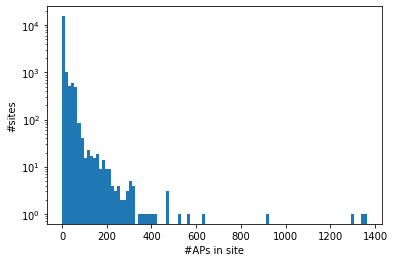

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


# df_pd.plot(kind="hist", x="count")

plt.hist(df_pd["count"], bins=100)
plt.xlabel("#APs in site")
plt.ylabel("#sites")
# plt.set_yscale("Log")
# ax.set_yscale('log')
# plt.set_loglevel()
plt.yscale("log")

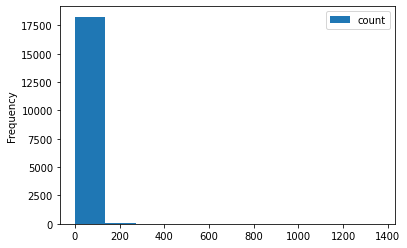

In [17]:
df_pd.plot(kind="hist", y="count")